## Dependencias

In [72]:
import random
import statistics
import pandas as pd  # Versión: 1.5.3
import numpy as np  # Versión: 1.22.3
from scipy.stats import norm  # Versión: 1.10.1
import matplotlib.pyplot as plt  # Versión: 3.7.0

In [73]:
# Establecemos una semilla
semilla = 42
random.seed(semilla)

## Lectura de datos

In [74]:
df = pd.read_csv('C:\\Users\\Jesús Camacho\\Downloads\\HousePrices.csv')

In [75]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [76]:
# Seleccionamos la columna 'SalePrice' del DataFrame 'df' que contiene los precios.
precios = df['SalePrice']
# Pasamos la columna de precios a una lista utilizando el método 'tolist()'.
precios = precios.tolist()

In [77]:
# Conjunto completo de observaciones
N = len(precios)
N

1460

In [78]:
# Obtenemos el parámetro (en este caso es el promedio)
promedio_real = statistics.mean(precios)
promedio_real

180921.19589041095

## Muestras

In [79]:
# Generamos 100 muestras de tamaño 70
n_muestras = 100
n = tamaño_muestra = 70
muestras = [random.sample(precios,tamaño_muestra) for _ in range(n_muestras)]

In [80]:
print(len(muestras))
print(len(muestras[0]))

100
70


## Estimación del precio promedio 

In [81]:
# Obtenemos el promedio para cada muestra y los guardamos en una lista
promedios = [statistics.mean(muestras[i]) for i in range(len(muestras))]

In [82]:
#len(promedios)

In [83]:
#promedios

In [84]:
#promedio_uno = promedios[0]
#muestra_uno = muestras[0]
#print(promedio_uno)
#print(muestra_uno)

In [85]:
#sum = 0
#for i in range(70):
#    sum += (1/69)*(muestra_uno[i]-promedio_uno)**2

In [86]:
# Obtenemos la varianza de cada muestra
# Nota: 'np.var' calcula la varianza dividiendo por 'n' y no por 'n-1', 
# por lo que se multiplica por 'n/(n-1)' para corregirlo
s2_est = []
for k in range(len(muestras)):
    s2_est.append(np.var(muestras[k])*(len(muestras[0])/(len(muestras[0])-1)))

In [87]:
#s2_est

In [88]:
#sum

In [89]:
#np.sqrt(4)

In [90]:
#N = 1460
#n = 70

In [91]:
# Calculamos los intervalos de confianza para el promedio de cada muestra
int_conf = []
for i in range(len(muestras)):
    lim_inf = promedios[i] + norm.ppf(0.025)*np.sqrt((1)*(1-n/N)*(s2_est[i]/n))
    lim_sup = promedios[i] - norm.ppf(0.025)*np.sqrt((1)*(1-n/N)*(s2_est[i]/n))
    int_conf.append((lim_inf, lim_sup))

In [92]:
#aux

## Tabla con los intervalos de confianza

In [93]:
tabla = {"Número de simulación":list(range(1, 101)),
        "Promedios":promedios}
tabla = pd.DataFrame(tabla)
tabla["Límite inferior intervalo"] = [x[0] for x in int_conf]
tabla["Límite superior intervalo"] = [x[1] for x in int_conf]
tabla["¿El intervalo contiene al parámetro de la población?"] = tabla.apply(lambda row: row["Límite inferior intervalo"] <= promedio_real <= row["Límite superior intervalo"], axis=1)

In [94]:
# Intervalos que no contienen al parámetro de la población
tabla[tabla["¿El intervalo contiene al parámetro de la población?"]==False]

,Número de simulación,Promedios,Límite inferior intervalo,Límite superior intervalo,¿El intervalo contiene al parámetro de la población?
1,2,200386.971429,182133.468227,218640.474630,False
14,15,164667.714286,149075.735460,180259.693111,False
15,16,161963.271429,149645.317794,174281.225063,False
20,21,165799.142857,151567.050686,180031.235028,False
28,29,162945.128571,150480.031532,175410.225611,False
34,35,206026.928571,181940.022185,230113.834957,False
51,52,166022.071429,151552.135779,180492.007079,False
58,59,166038.028571,153208.557313,178867.499830,False
60,61,203201.671429,182732.465060,223670.877797,False
84,85,156571.485714,142436.369722,170706.601707,False


## Gráfico "Intervalos de confianza"

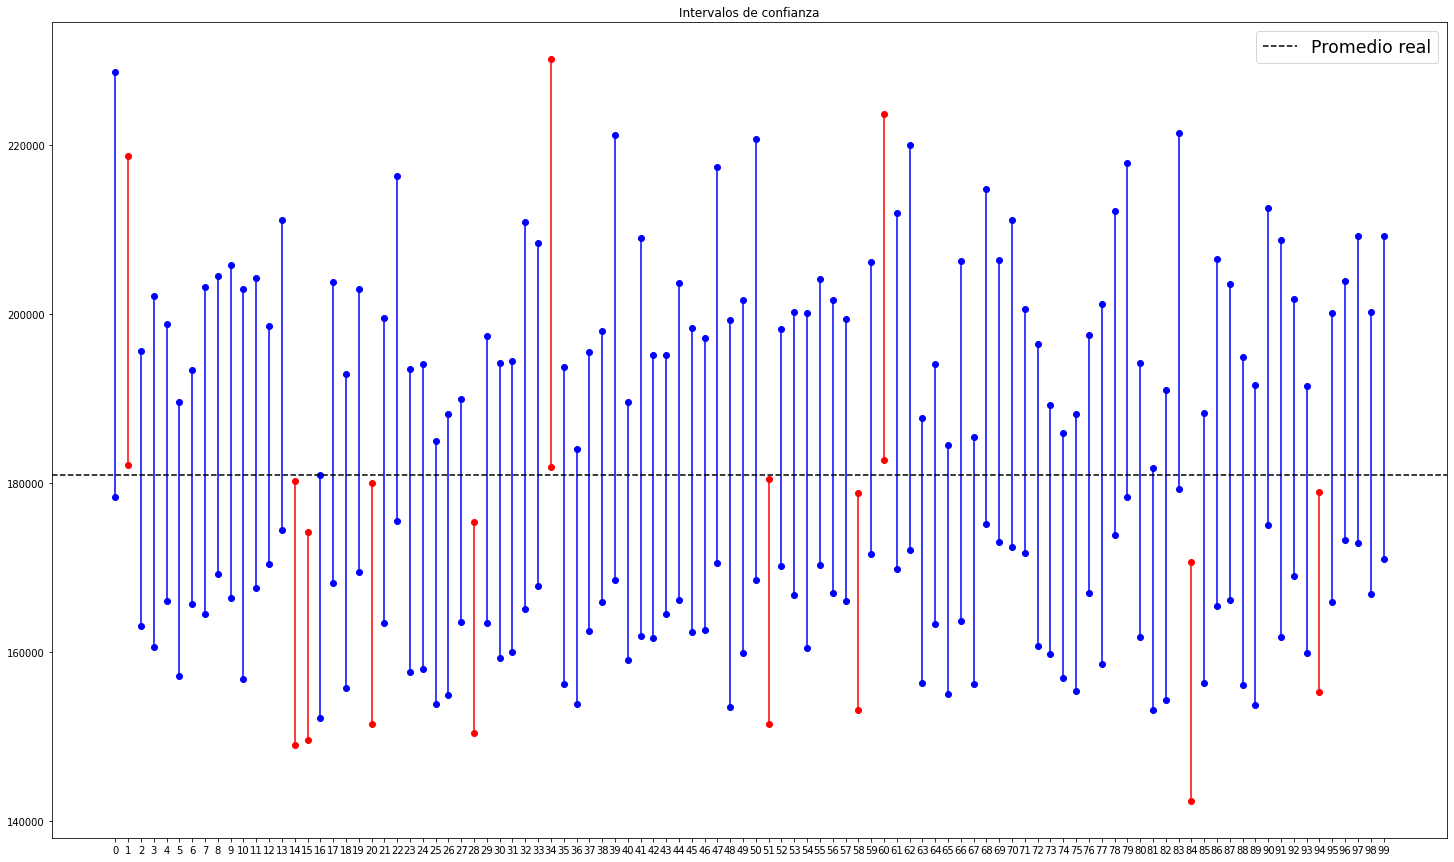

In [99]:
# Creamos una figura y un eje
fig, ax = plt.subplots(figsize=(25, 15))

# Dibujamos los intervalos de confianza
for index, row in tabla.iterrows():
    x = index  # Utilizamos el índice de fila como posición en x
    y1 = row["Límite inferior intervalo"]
    y2 = row["Límite superior intervalo"]
    contiene_parametro = row["¿El intervalo contiene al parámetro de la población?"]
    
    if contiene_parametro:
        ax.plot([x, x], [y1, y2], marker='o', color='blue')  # Línea azul si contiene el parámetro
    else:
        ax.plot([x, x], [y1, y2], marker='o', color='red')  # Línea roja si no contiene el parámetro

ax.axhline(y=promedio_real, color='black', linestyle='--', label='Promedio real')  # Graficar la línea del promedio real

# Etiquetar el eje x con los índices de fila
ax.set_xticks(range(len(tabla)))
ax.set_xticklabels(tabla.index)

# Configurar las etiquetas y el título
#ax.set_xlabel("Fila")
#ax.set_ylabel("Valores")
ax.set_title("Intervalos de confianza")

##plt.savefig("grafico.png")

plt.legend(fontsize='xx-large')

# Mostramos la gráfica
plt.show()
